<a href="https://colab.research.google.com/github/Valejbk/AnalisisTiendasRMP/blob/main/optimizaci%C3%B3n_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importamos pandas
#leemos el archivo copiando la ruta
#revisamos el contenido general del archivo, del conjunto de datos: 71.175 filas y 11 columnas

import pandas as pd

datos = pd.read_csv('/content/flights.csv')

datos.shape


(71175, 11)

In [2]:
#veremos con más detalle las primeras 5 filas
#el horario está en minutos y segundos. En el caso del primer vuelo (26) el delay es de 70 minutos y 12 segundos
#los 12 segundos se obtienen de multiplicar .20 x 60 (cantidad de segundo q' tiene 1 minuto)


datos.head()


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [3]:
#redondeamos

round(.20 * 60)


12

In [4]:
#ahora vamos a los metadatos con .info, son los datos acerca de los datos

datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [5]:
#vamos más allá en el análisis exploratorio y ver la estadística de los valores (cuartiles, mínimo, máximo, promedio, etc.)
#desde ya nos interesa la variable respuesta (que es el retraso o delay)
#el conteo de los valores oara todos es 71.175
#el promedio de retraso es 12 minutos con app. 30 segundos
#el desvío estándar (variación que puede haber) es de 23 minutos, que es mucho (margen muy amplio con respecto al promedio)
#valor mínimo de retraso y valor máximo de retraso
#el valor negativo de -41.02 significa que hay 1 vuelo entre los 71.175 que salió 41 minutos adelantado
#en el primer cuartil, o sea, hasta el 25% de los vuelos han salido 4 minutos y algo adelantados
# en el segundo cuartil, hasta la mediana, 50% de los vuelos han salido con 9 minutos y 45 segundos de retraso
#en el tercer cuartil, 75% de los vuelos han salido con retraso de 27 minutos y 40 segundos
#valor máximo de atraso de más de 125 minutos (2 horas)

datos.describe()   #vemos las variables numéricas


,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [ ]:
#debemos ver cómo se comporta el retraso de los vuelos
#generar un modelo de aprendizaje de máquina con los recursos de la biblioteca Scikit Learn y poder prevenir situaciones
#con 1 margen de error queremos acercarnos lo m,áximo posible a la demora de 1 vuelo y generar planes en torno a eso (estacionamientos, taxis, etc.)



In [6]:
#también podemos leer las variables categóricas
#columna 1: 3 aerolíneas; la top es BZ; su frecuencia es=47.598
#columna 2: 6 tipos distintos de avión; el top es el Airbus A320; frecuencia 30.778
#columna 3: schengen (sí, no (2)); schengen es top; frecuencia 42.569
#columna 4: 10 aeropuertos de origen; el top es TZF; frecuencia 14.162

datos.describe(include= 'O')


,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [7]:
#hecho el análisis exploratorio, toca el análisis visual
#interesa especial%, atrasos de vuelos respecto a las aerolíneas y n° de vuelos por cada aerolínea

import seaborn as sns
import matplotlib.pyplot as plt


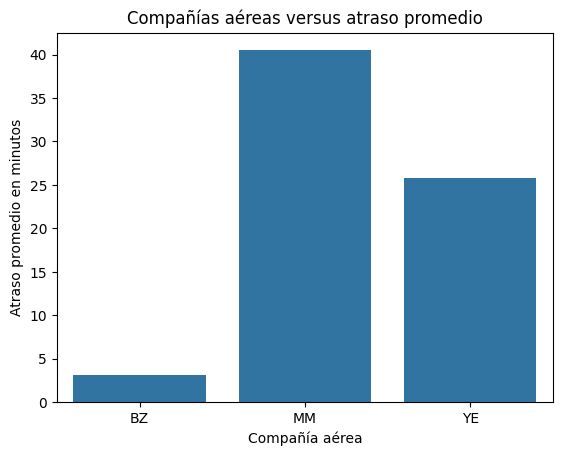

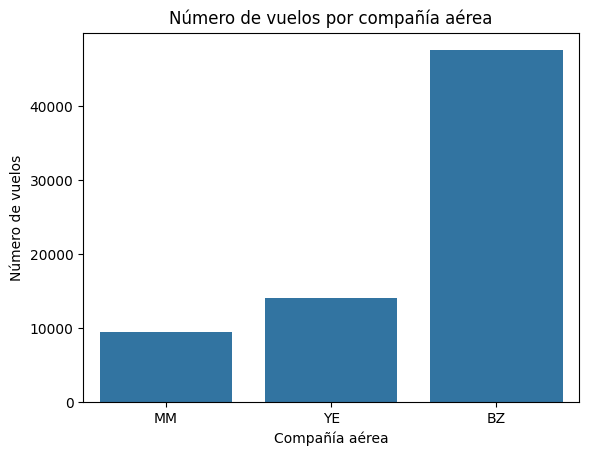

In [8]:
#avg---> average
#groupby para agrupar por aerolínea
#'delay' porq' nos interesa el retraso. Es la variable respuesta y va entre []
#mean() para el promedio (porque estamos agregando elementos y se necesita una función que trabaje con los datos en vista a 1 objetivo)
#reset_index para dejarlo como columna (si no lo hacemos, va a quedar como índice)
#gráfico con sns; título con plt.title; etiquetas con plt.xlabel y plt.ylabel
#aprovechamos y haremos un gráfico que nos muestre el N° DE VUELOS POR COMPAÑÍA AÉREA---> COUNTPLOT

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()

sns.barplot(x= 'airline', y= 'delay', data= avg_delay)
plt.title('Compañías aéreas versus atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')

plt.show()


sns.countplot(data= datos, x= 'airline')
plt.title('Número de vuelos por compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')

plt.show()


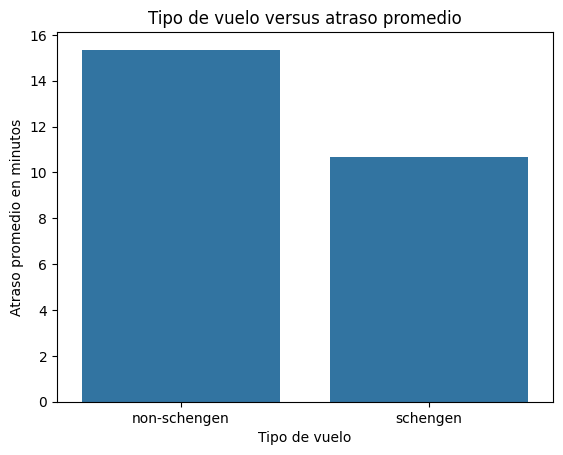

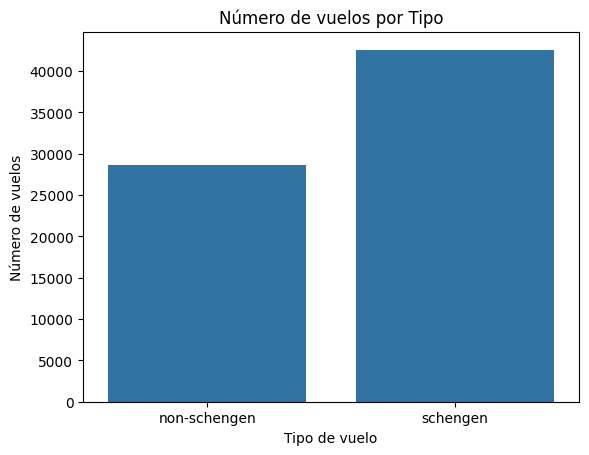

In [9]:



avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()

sns.barplot(x= 'schengen', y= 'delay', data= avg_delay)
plt.title('Tipo de vuelo versus atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')

plt.show()


sns.countplot(data= datos, x= 'schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')

plt.show()



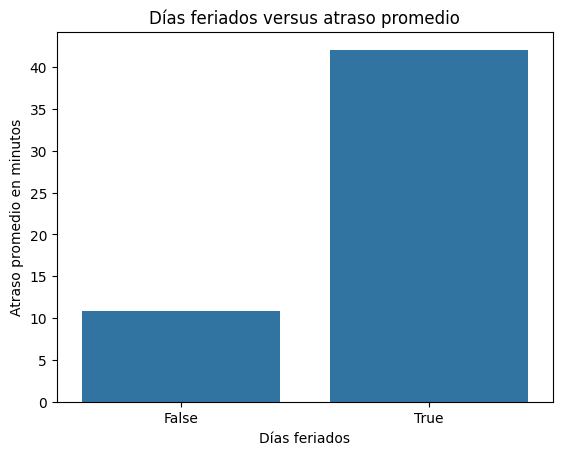

In [10]:
#días feriados is_holiday

avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()

sns.barplot(x= 'is_holiday', y= 'delay', data= avg_delay)
plt.title('Días feriados versus atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')

plt.show()


In [11]:
#veamos qué devuelve exactamente la primera parte del código que trabaja con la columna aircraft_type

datos['aircraft_type'].value_counts().index


Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

In [12]:
#para ver que los entrega ordenados por cantidad (de > a <)

datos['aircraft_type'].value_counts()


,count
aircraft_type,
Airbus A320,30778
Airbus A330,16654
Boeing 787,9606
Embraer E175,7098
Boeing 737,4722
Boeing 777,2317


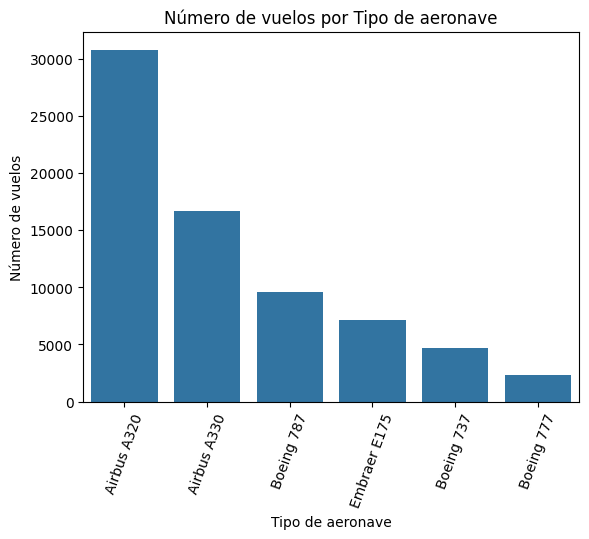

In [13]:
#cantidad de aviones que circulan en el aeropuerto
#tenemos que tomar 1° la cantidad de aviones con countplot
#order = order (que acabamos de hacer)
#rotation porq' los nombres de los aviones son largos

order = datos['aircraft_type'].value_counts().index

sns.countplot(data= datos, x= 'aircraft_type', order= order)
plt.title('Número de vuelos por Tipo de aeronave')
plt.xticks(rotation= 70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')

plt.show()



# **Distribución de los datos**

<Axes: xlabel='arrival_time', ylabel='Count'>

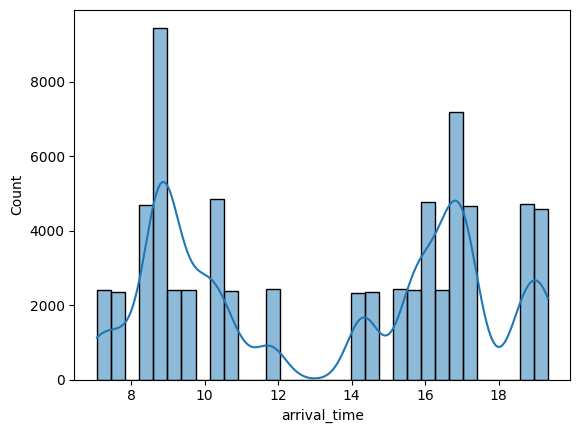

In [14]:
#concepto de histograma (histplot) q' permite analizar la frecuencia de nuestros diferentes valores
#tópicos: horario salida vueos, horario llegada, retraso en minutos
#la data va a ser "datos"; tiempo de arribo (arrival_time); curva de densidad=True (Kde=)


sns.histplot(data= datos, x= 'arrival_time', kde= True)



In [15]:
#fórmula numpy, creamos 1 función que ayuda a establecer el rango intercuartil y el ancho de los bins
#cargamos con play

import numpy as np

def ancho_bin(df, columna):
   q75, q25 = np.percentile(df[columna], [75, 25])
   iqr = q75 - q25

   ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
   return ancho



<Axes: xlabel='arrival_time', ylabel='Count'>

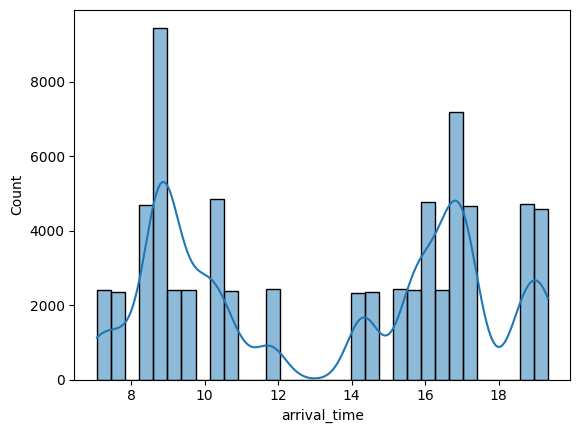

In [16]:
#creamos 1 variable que llamaremos binwidth para establecer el ancho del bin
#usamos los 2 parámetros: 1)conjunto de datos y 2)nombre columna (arrival_time)
#traemos nuevamente el código


binwidth = ancho_bin(datos, 'arrival_time')
sns.histplot(data= datos, x= 'arrival_time', kde= True, binwidth= binwidth)



<Axes: xlabel='departure_time', ylabel='Count'>

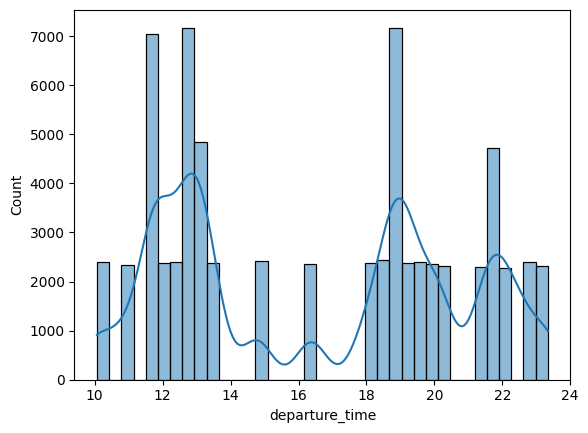

In [17]:
#ahora lo mismo para el horario de salida

binwidth = ancho_bin(datos, 'departure_time')
sns.histplot(data= datos, x= 'departure_time', kde= True, binwidth= binwidth)



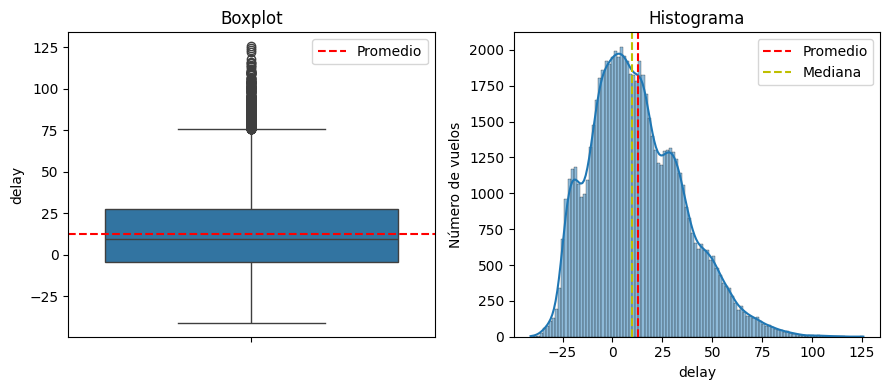

In [18]:
#ahora lo importante---> horario de retraso ---> gráfico distribución variable respuesta
#generamos la variable atraso promedio y atraso_mediana
#la idea es trabajar con el gráfico boxplot e histograma


atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

#1° el lienzo con 2 gráficas, lado a lado
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data= datos, y= 'delay', ax= ax[0]) # a la izquierda
ax[0].set_title('Boxplot')
#añadiremos 1 línea horizontal para indicar el promedio
ax[0].axhline(y= atraso_promedio, color= 'r', linestyle= '--', label= 'Promedio') #línea horizontal, cortando el eje y
ax[0].legend()


binwidth = ancho_bin(datos, 'delay')
sns.histplot(data= datos, x= 'delay', ax= ax[1], kde= True, binwidth= binwidth) # a la derecha
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')

#vamos a generar 2 líneas verticales, 1 para el promedio y potra para la mediana (ax[1] es el lado derecho)
ax[1].axvline(x= atraso_promedio, color= 'r', linestyle= '--', label= 'Promedio')
ax[1].axvline(x= atraso_mediana, color= 'y', linestyle= '--', label= 'Mediana')
ax[1].legend()

#para evitar que los gráficos se solapen
plt.tight_layout()

plt.show()



In [ ]:
#en el boxplot:
#la mediana está como en 10 minutos---> recordemos la tabla que arrojó datos.describe (muy parecidos los datos)
#el promedio está en 12,5 ó 13 minutos---> recordemos datos.describe
#el tiempo de atraso que está considerando el boxplot es hasta 75 minutos. Lo demás es outliers u observaciones atípicas
#el mínimo está en negativo porq' son los 44 minutos de adelanto del vuelo


#en el histograma:
#el promedio y la mediana se encuentran cerca, lo que indica una distribución aproximada a la normal

